In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import scipy.optimize
import scipy.spatial
from IPython import display
from ipywidgets import interact ,widgets
import scipy.stats as stats
import math

In [2]:
from sklearn.datasets import fetch_olivetti_faces

In [3]:
faces=fetch_olivetti_faces()

In [4]:
X=faces.data
y=faces.target

In [5]:
len(X)

400

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

# Logistic Regression #

In [8]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [9]:
lr.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
lr.score(X_test,y_test)

0.9666666666666667

In [11]:
y_predicted=lr.predict(X_test)
from sklearn.metrics import confusion_matrix

In [12]:
cm=confusion_matrix(y_test,y_predicted)

In [13]:
cm

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 4]], dtype=int64)

Text(69.0, 0.5, 'truth')

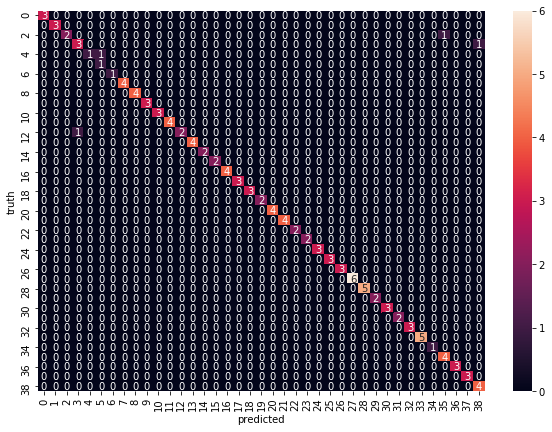

In [14]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")

In [15]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1] [0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0] [3 3 2 3 1 1 1 4 4 3 3 4 2 4 2 2 4 3 3 2 4 4 2 2 3 3 3 6 5 2 3 2 3 5 1 4 3
 3 4] [117 117 117 115 118 118 119 116 116 117 117 116 117 116 118 118 116 117
 117 118 116 116 118 118 117 117 117 114 115 118 117 118 117 115 119 115
 117 117 115]


In [16]:
n=len(FP)

In [17]:
n

39

In [18]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[3, 3, 2, 4, 1, 2, 1, 4, 4, 3, 3, 4, 2, 4, 2, 2, 4, 3, 3, 2, 4, 4, 2, 2, 3, 3, 3, 6, 5, 2, 3, 2, 3, 5, 1, 5, 3, 3, 5]


In [19]:
d01=pd.DataFrame(FP,columns=['logisticregfp'])
d02=pd.DataFrame(TP,columns=['logisticregtp'])
d=pd.DataFrame(M,columns=['logisticreg'])

In [20]:
d

,logisticreg
0,3
1,3
2,2
3,4
4,1
5,2
6,1
7,4
8,4
9,3


# DECISION TREE#

In [21]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [22]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
model.score(X_test,y_test)

0.5583333333333333

In [24]:
y_predicted=model.predict(X_test)

In [25]:
cm=confusion_matrix(y_test,y_predicted)

In [26]:
cm

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 2]], dtype=int64)

In [27]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[3 0 1 2 2 0 2 0 4 1 1 0 5 2 2 1 0 2 0 0 1 0 2 1 1 1 1 0 2 2 2 1 0 2 3 2 1
 0 1 2] [3 2 1 0 1 0 0 2 4 1 0 2 1 2 1 1 3 2 1 0 4 0 0 1 3 2 2 3 4 0 0 0 0 1 0 0 3
 1 0 2] [0 1 2 4 1 1 1 2 0 2 3 2 2 2 1 1 1 1 2 2 0 4 2 1 0 1 1 3 1 2 3 2 3 4 0 1 1
 2 3 2] [114 117 116 114 116 119 117 116 112 116 116 116 112 114 116 117 116 115
 117 118 115 116 116 117 116 116 116 114 113 116 115 117 117 113 117 117
 115 117 116 114]


D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


In [28]:
n=len(FP)

In [29]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[3, 1, 3, 6, 3, 1, 3, 2, 4, 3, 4, 2, 7, 4, 3, 2, 1, 3, 2, 2, 1, 4, 4, 2, 1, 2, 2, 3, 3, 4, 5, 3, 3, 6, 3, 3, 2, 2, 4, 4]


In [30]:
d1=pd.DataFrame(M,columns=['decisiontree'])
d11=pd.DataFrame(FP,columns=['decisiontreefp'])
d12=pd.DataFrame(TP,columns=['decisiontreetp'])

# KNN(9) #

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn=KNeighborsClassifier(n_neighbors=9)

In [33]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [34]:
knn.score(X_test,y_test)

0.6333333333333333

In [35]:
y_predicted=knn.predict(X_test)

In [36]:
cm=confusion_matrix(y_test,y_predicted)

In [37]:
cm

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [38]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[1 0 2 1 4 0 1 0 2 0 1 0 2 0 7 0 1 2 0 0 2 0 3 0 2 7 1 0 0 2 0 0 0 0 1 0 0
 1 1 0] [2 0 3 4 0 0 1 1 0 1 0 1 2 1 0 1 3 0 1 2 2 0 2 0 0 2 0 4 2 0 0 1 0 0 0 0 3
 1 0 4] [1 3 0 0 2 1 0 3 4 2 3 3 1 3 2 1 1 3 2 0 2 4 0 2 3 1 3 2 3 2 3 1 3 5 0 1 1
 2 3 0] [116 117 115 115 114 119 118 116 114 117 116 116 115 116 111 118 115 115
 117 118 114 116 115 118 115 110 116 114 115 116 117 118 117 115 119 119
 116 116 116 116]


D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
D:\anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
D:\anaconda\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [39]:
n=len(FP)

In [40]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[2, 3, 2, 1, 6, 1, 1, 3, 6, 2, 4, 3, 3, 3, 9, 1, 2, 5, 2, 0, 4, 4, 3, 2, 5, 8, 4, 2, 3, 4, 3, 1, 3, 5, 1, 1, 1, 3, 4, 0]


In [41]:
d2=pd.DataFrame(M,columns=['knn'])
d21=pd.DataFrame(FP,columns=['knnfp'])
d22=pd.DataFrame(TP,columns=['knntp'])

# RANDOM FOREST #

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model=RandomForestClassifier(n_estimators=35)

In [44]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
y_predicted=model.predict(X_test)

In [46]:
model.score(X_test,y_test)

0.925

In [47]:
cm=confusion_matrix(y_test,y_predicted)

In [48]:
cm

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 4]], dtype=int64)

In [49]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[0 0 0 3 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0
 1 1] [0 0 0 0 1 0 0 0 3 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0] [3 3 3 4 1 1 1 4 1 3 3 4 2 4 2 2 4 3 3 2 4 4 0 2 3 3 3 5 4 2 3 2 3 5 1 4 3
 3 4] [117 117 117 113 118 119 119 116 116 117 117 115 117 116 118 118 116 117
 117 118 116 116 118 118 117 117 117 114 115 116 117 118 117 115 119 115
 117 116 115]


D:\anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [51]:
n=len(FP)

In [52]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[3, 3, 3, 7, 1, 1, 1, 4, 1, 3, 3, 5, 2, 4, 2, 2, 4, 3, 3, 2, 4, 4, 0, 2, 3, 3, 3, 5, 4, 4, 3, 2, 3, 5, 1, 5, 3, 4, 5]


In [53]:
d3=pd.DataFrame(M,columns=['rf'])
d31=pd.DataFrame(FP,columns=['rffp'])
d32=pd.DataFrame(TP,columns=['rftp'])

# SUPPORT  VECTOR  MACHINE #

In [54]:
from sklearn.svm import SVC

In [55]:
model=SVC(random_state=35)
model.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=35,
  shrinking=True, tol=0.001, verbose=False)

In [56]:
y_predicted=model.predict(X_test)

In [57]:
model.score(X_test,y_test)

0.0

In [58]:
cm=confusion_matrix(y_test,y_predicted)

In [59]:
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 120   0
   0   0   0   0] [3 3 3 4 2 1 1 4 4 3 3 4 3 4 2 2 4 3 3 2 4 4 2 2 3 3 3 6 5 2 3 2 3 5 0 1 4
 3 3 4] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0] [117 117 117 116 118 119 119 116 116 117 117 116 117 116 118 118 116 117
 117 118 116 116 118 118 117 117 117 114 115 118 117 118 117 115   0 119
 116 117 117 116]


D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
D:\anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
D:\anaconda\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [61]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 120, 0, 0, 0, 0]


In [62]:
d4=pd.DataFrame(M,columns=['svm'])
d41=pd.DataFrame(FP,columns=['svmfp'])
d42=pd.DataFrame(TP,columns=['svmtp'])


# MLP #

In [63]:
from sklearn.neural_network import MLPClassifier

In [64]:
mlp=MLPClassifier(random_state=37)
mlp.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=37, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [65]:
mlp.score(X_train,y_train)

0.8

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit(X_train).transform(X_train)
X_test_scaled=scaler.fit(X_test).transform(X_test)
mlp=MLPClassifier(max_iter=1000,random_state=42)
mlp.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [67]:
mlp.score(X_train_scaled,y_train)

1.0

In [68]:
mlp.score(X_test_scaled,y_test)

0.925

In [69]:
y_predicted=mlp.predict(X_test)

In [70]:
cm=confusion_matrix(y_test,y_predicted)

In [71]:
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [72]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[  0   0   0   0   0 116   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0   0
   0   0   0] [3 3 3 4 2 0 1 4 4 3 3 4 3 4 2 2 4 3 3 2 4 4 2 2 3 3 3 6 5 2 3 2 3 5 1 4 3
 3 4] [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0] [117 117 117 116 118   3 119 116 116 117 117 116 117 116 118 118 116 117
 117 118 116 116 118 118 114 117 117 114 115 118 117 118 117 115 119 116
 117 117 116]


D:\anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [73]:
n=len(FP)

In [74]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[0, 0, 0, 0, 0, 117, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [75]:
d5=pd.DataFrame(M,columns=['mlp'])
d51=pd.DataFrame(FP,columns=['mlpfp'])
d52=pd.DataFrame(TP,columns=['mlptp'])


# NAIVE  BAYES ALGORITHM #

In [76]:
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [77]:
bnb=BernoulliNB(binarize=0.1)
bnb.fit(X_train,y_train)
bnb.score(X_test,y_test)

0.008333333333333333

In [78]:
y_predicted=bnb.predict(X_test)

In [79]:
cm=confusion_matrix(y_test,y_predicted)

In [80]:
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [81]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[  0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0 115   1
   0   0   0   0] [3 3 3 4 2 1 1 4 4 2 3 4 3 4 2 2 4 3 3 2 4 4 2 2 3 3 3 6 5 2 3 2 3 5 0 1 4
 3 3 4] [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0] [117 117 117 116 118 119 119 116 116 115 117 116 117 116 118 118 116 117
 117 118 116 116 118 118 117 117 116 114 115 118 117 118 117 115   5 118
 116 117 117 116]


D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
D:\anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
D:\anaconda\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [82]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 115, 1, 0, 0, 0]


In [83]:
d6=pd.DataFrame(M,columns=['bnb'])
d61=pd.DataFrame(FP,columns=['bnbfp'])
d62=pd.DataFrame(TP,columns=['bnbtp'])
d63=pd.DataFrame(y_predicted,columns=['prd'])

In [84]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
mnb.score(X_test,y_test)

0.8333333333333334

In [85]:
y_predicted=mnb.predict(X_test)

In [86]:
cm=confusion_matrix(y_test,y_predicted)

In [87]:
cm

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 2],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 3]], dtype=int64)

In [88]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[0 0 2 0 0 0 0 0 1 1 0 0 4 0 0 0 1 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 1 0
 1 6] [1 0 3 2 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 3 0 2 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 1] [2 3 0 2 1 0 1 4 4 3 3 3 2 4 2 2 3 3 3 2 1 4 0 2 3 2 3 6 4 2 2 2 3 5 1 4 3
 3 3] [117 117 115 116 118 119 119 116 115 116 117 116 113 116 118 118 115 117
 117 118 116 116 118 118 116 115 117 114 115 118 117 118 117 115 119 115
 117 116 110]


D:\anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [89]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[2, 3, 2, 2, 1, 0, 1, 4, 5, 4, 3, 3, 6, 4, 2, 2, 4, 3, 3, 2, 1, 4, 0, 2, 4, 4, 3, 6, 4, 2, 2, 2, 3, 5, 1, 5, 3, 4, 9]


In [90]:
d7=pd.DataFrame(M,columns=['mnb'])
d71=pd.DataFrame(FP,columns=['mnbfp'])
d72=pd.DataFrame(TP,columns=['mnbtp'])
d73=pd.DataFrame(y_predicted,columns=['prd'])

In [91]:
    gnb=GaussianNB()
    gnb.fit(X_train,y_train)
    gnb.score(X_test,y_test)

0.8333333333333334

In [92]:
y_predicted=gnb.predict(X_test)

In [93]:
y_predicted=gnb.predict(X_test)

In [94]:
cm

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 2, 0, 1],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 4]], dtype=int64)

In [95]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[0 0 0 3 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 6 1 0
 0 0 6] [1 0 2 1 1 0 0 2 2 0 0 0 1 1 0 0 1 0 0 0 0 0 2 0 1 0 0 2 0 1 0 0 0 1 0 0 0
 1 0 0] [2 3 1 3 1 1 1 2 2 3 3 4 2 3 2 2 3 3 3 2 4 4 0 2 2 3 3 4 5 1 3 2 3 4 0 1 4
 2 3 4] [117 117 117 113 118 119 119 116 116 115 117 116 117 116 118 118 116 117
 117 118 116 116 118 118 117 116 117 114 115 118 116 118 117 115 114 118
 116 117 117 110]


D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
D:\anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
D:\anaconda\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [96]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[2, 3, 1, 6, 1, 1, 1, 2, 2, 5, 3, 4, 2, 3, 2, 2, 3, 3, 3, 2, 4, 4, 0, 2, 2, 4, 3, 4, 5, 1, 4, 2, 3, 4, 6, 2, 4, 2, 3]


In [97]:
d8=pd.DataFrame(M,columns=['gnb'])
d81=pd.DataFrame(FP,columns=['gnbfp'])
d82=pd.DataFrame(TP,columns=['gnbtp'])
d83=pd.DataFrame(y_predicted,columns=['prd'])

# TWO SAMPLE  T-TEST #

In [98]:
from scipy.stats import ttest_ind
from statsmodels.stats import weightstats as stests

In [99]:
ttest,pval = ttest_ind(d82['gnbtp'],d72['mnbtp'])
print("p-value",pval)

p-value 0.8198077389812402


In [100]:
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

we accept null hypothesis


# TWO SAMPLE Z-TEST #

In [101]:
ztest ,pval1 = stests.ztest(d82['gnbtp'], x2=d52['mlptp'], value=0,alternative='two-sided')
print(float(pval1))

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

1.0323735222826237e-38
accept null hypothesis


# ONE WAY ANOVA #

In [102]:
F, p = stats.f_oneway(d02['logisticregtp'], d12['decisiontreetp'], d22['knntp'],d32['rftp'],d42['svmtp'],d52['mlptp'],d62['bnbtp'],d72['mnbtp'],d82['gnbtp'])

print("p-value for significance is: ", p)

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  2.662948274359492e-64
reject null hypothesis


# CHI-SQUARE TEST #

In [103]:
contingency_table=pd.crosstab(d83["prd"],d73["prd"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 prd  0   1   2   3   4   6   7   8   9   10  ...  29  30  31  32  33  35  36  \
prd                                          ...                               
0     2   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1     0   3   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2     0   0   2   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3     0   0   0   2   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4     0   0   0   0   1   0   0   0   0   0  ...   0   0   0   0   0   0   0   
6     0   0   0   0   0   1   0   0   0   0  ...   0   0   0   0   0   0   0   
7     0   0   0   0   0   0   4   0   0   0  ...   0   0   0   0   0   0   0   
8     0   0   0   0   0   0   0   5   0   0  ...   0   0   0   0   0   0   0   
9     0   0   0   0   0   0   0   0   4   0  ...   0   0   0   0   0   0   0   
10    0   0   0   0   0   0   0   0   0   3  ...   0   0   0   0   0   0   0   
11    0   0   0   

In [104]:
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[2 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 9]]


In [105]:
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[0.03333333 0.05       0.03333333 ... 0.05       0.06666667 0.15      ]
 [0.05       0.075      0.05       ... 0.075      0.1        0.225     ]
 [0.03333333 0.05       0.03333333 ... 0.05       0.06666667 0.15      ]
 ...
 [0.05       0.075      0.05       ... 0.075      0.1        0.225     ]
 [0.06666667 0.1        0.06666667 ... 0.1        0.13333333 0.3       ]
 [0.15       0.225      0.15       ... 0.225      0.3        0.675     ]]


In [106]:
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [107]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)

print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

chi-square statistic:- 234.99999999999986
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 234.99999999999986
critical_value: 3.841458820694124
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


# BARTLETT'S TEST #

In [108]:
t,p=scipy.stats.bartlett(d02['logisticregtp'], d12['decisiontreetp'], d22['knntp'],d32['rftp'],d42['svmtp'],d52['mlptp'],d62['bnbtp'],d72['mnbtp'],d82['gnbtp'])
print('p value',p)


p value 0.0


D:\anaconda\lib\site-packages\scipy\stats\morestats.py:2217: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [109]:
if(p<0.05):
    print("reject null hypothesis")
else:
    print("reject alternate hypothesis")

reject null hypothesis


# MEDIAN  TEST #

In [110]:
from scipy.stats import median_test

In [111]:
stat, p, med, tbl = median_test(d02['logisticregtp'], d12['decisiontreetp'], d22['knntp'],d32['rftp'],d42['svmtp'],d52['mlptp'],d62['bnbtp'],d72['mnbtp'],d82['gnbtp'])


In [114]:
print("the median is",med)
print("the contigency table is",tbl)
print("the p value is",p)

the median is 1.0
the contigency table is [[35 21 24 33  0  0  0 32 32]
 [ 4 19 16  6 40 39 40  7  8]]
the p value is 9.409225922423793e-38


In [115]:
if(p<0.05):
    print("reject null hypothesis")
else:
    print("reject alternate hypothesis")

reject null hypothesis


# MANN-WHITENEY  TEST #

In [117]:
t,p= scipy.stats.mannwhitneyu(d02['logisticregtp'], d12['decisiontreetp'], use_continuity=True, alternative="two-sided")

In [118]:
p

6.979635829804878e-06

In [119]:
if(p<0.025):
    print("reject null hypothesis")
else:
    print("reject alternate hypothesis")

reject null hypothesis
